# Exploratory Data Analysis And Feature Selection

## Importing the Necessary Libraries

Let's start by importing the libraries we need to conduct Exploratory Data Analysis (EDA) on our dataset:


In [312]:
import time
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns 
import plotly.express as px        
import matplotlib.pyplot as plt  

## Loading and Previewing the Dataset

The first step is to load our dataset to understand its structure and content. We are using `pandas` to read the CSV file:

```python



In [313]:
df=pd.read_csv("C:/Users/COCOCE/family_planning_cleaned.csv")
print(df.shape)
df.head()

(15174, 39)


,name,method_initiation_date,province,sector,village,district,cell,company,date_of_birth,gender,...,reason_to_stop,choosen_method,method_offered,first_appointment_date,postpartum_family_planning,the_period_the_method_will_last,discharging,profession_cleaned,profession_category,reason_to_stop_category
0,FP-2408-0096384,2024-08-14,Kigali,Gatenga,Juru,Kicukiro,Nyanza,Bethsaida_hc,1991-04-10,Female,...,side effect,NaN,Depo-Provera,2024-11-14,No,3.0,0,trader,services,Side Effects
1,FP-2408-0096411,2024-11-12,Kigali,Kagarama,Kanserege,Kicukiro,Kanserege,Bethsaida_hc,NaN,NaN,...,INJECTION,NaN,NaN,NaN,NaN,NaN,No,unknown,other,Wanted a more effective method
2,FP-2408-0096436,NaN,Kigali,Gatenga,Bigo,Kicukiro,Nyarurama,Bethsaida_hc,2001-10-11,Female,...,stop in order to continue long method,NaN,Injectable,NaN,No,NaN,0,housekeeper,household,Wanted a more effective method
3,FP-2408-0096523,2024-08-14,Kigali,Gitega,NaN,Nyarugenge,Gacyamo,Kacyiru_hc,2002-07-07,Female,...,NaN,NaN,NaN,2024-08-21,NaN,NaN,0,housekeeper,household,NaN
4,FP-2408-0096587,2024-08-14,Kigali,Gisozi,Byimana,Gasabo,Musezero,Kacyiru_hc,2003-02-02,Female,...,difficult to drink,NaN,NaN,2024-08-21,NaN,NaN,0,tailor,services,Health concerns


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15174 entries, 0 to 15173
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   name                                   15174 non-null  object 
 1   method_initiation_date                 11580 non-null  object 
 2   province                               14927 non-null  object 
 3   sector                                 14926 non-null  object 
 4   village                                14857 non-null  object 
 5   district                               14927 non-null  object 
 6   cell                                   14926 non-null  object 
 7   company                                15174 non-null  object 
 8   date_of_birth                          15094 non-null  object 
 9   gender                                 15095 non-null  object 
 10  consultation_date                      15102 non-null  object 
 11  ed

## Checking for Missing Data

To identify columns with missing values in the dataset, we calculate the percentage of missing data for each column.

In [315]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

first_date_of_last_menstrual_period_     0.622446
family_plan_method_used                  0.518321
reason_to_stop_category                  0.518255
duration_of_utilization                  0.464940
the_period_the_method_will_last          0.430869
reason_to_stop                           0.417688
method_offered                           0.400488
choosen_method                           0.394227
desired_method                           0.350666
birth_limitation                         0.310399
birth_spacing                            0.268486
first_appointment_date                   0.253987
method_initiation_date                   0.236853
date_of_last_delivery                    0.161790
postpartum_family_planning               0.031304
village                                  0.020891
sector                                   0.016344
cell                                     0.016344
district                                 0.016278
province                                 0.016278


## Converting Date Columns to Datetime Format

In [316]:
#1.convert date columns
def convert_columns_to_datetime(df, columns):
    """
    Converts specified columns of a DataFrame to datetime format.

    Parameters:
    - df (pd.DataFrame): The DataFrame to modify.
    - columns (list): List of column names to convert.

    Returns:
    - pd.DataFrame: The DataFrame with specified columns converted to datetime.
    """
    date_cols = [col for col in df.columns if 'date' in col.lower()]
    for col in date_cols:
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
        except Exception as e:
            print(f"Could not convert column '{col}' to datetime: {e}")
    return df


In [317]:
columns_to_convert = [
    'method_initiation_date',
    'date_of_birth',
    'consultation_date',
    'date_of_last_delivery',
    'first_appointment_date',
    'first_date_of_last_menstrual_period_'
]

df = convert_columns_to_datetime(df, columns_to_convert)


## Calculating Age Based on Date of Birth and Consultation Date

In [318]:
df['age'] = df['consultation_date'].dt.year - df['date_of_birth'].dt.year

## Calculating Time Since Last Menstrual Period (LMP)

This is done by subtracting the **date of the first day of the last menstrual period (LMP)** from the **consultation date**. The result is the number of days between these two dates.


In [319]:
df['time_since_lmp'] = ( df['consultation_date'] - df['first_date_of_last_menstrual_period_']).dt.days

In [320]:
df['time_since_lmp'].value_counts()

time_since_lmp
0.0      1813
1.0       382
2.0       344
3.0       333
4.0       229
         ... 
607.0       1
386.0       1
76.0        1
553.0       1
155.0       1
Name: count, Length: 458, dtype: int64

In [321]:
skewness = df['time_since_lmp'].skew()
print(f"Skewness: {skewness}")


Skewness: -59.93537531069909


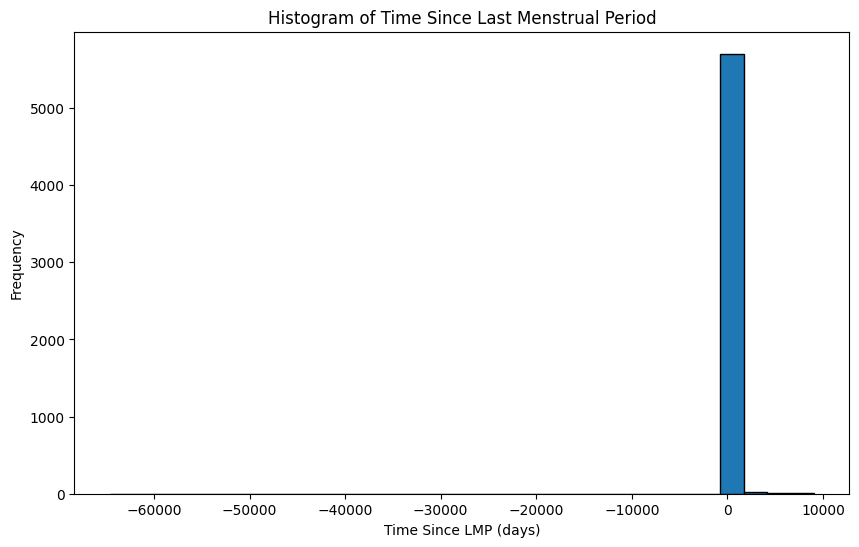

In [322]:

plt.figure(figsize=(10, 6))
df['time_since_lmp'].hist(bins=30, edgecolor='black')
plt.title('Histogram of Time Since Last Menstrual Period')
plt.xlabel('Time Since LMP (days)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


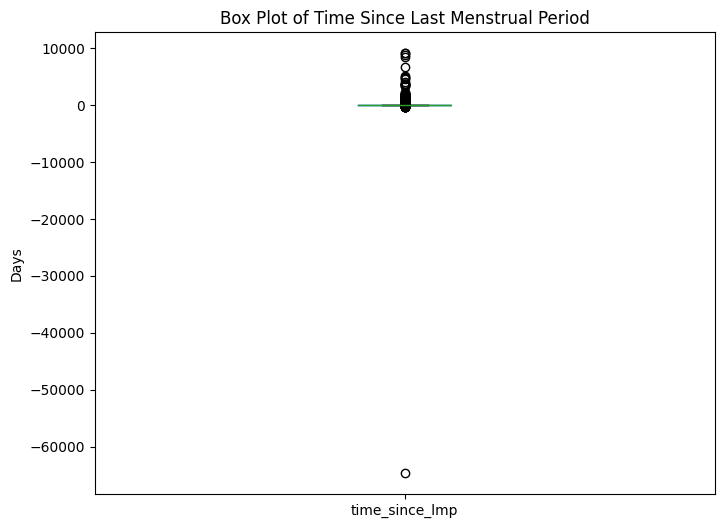

In [323]:

plt.figure(figsize=(8, 6))
df.boxplot(column='time_since_lmp')
plt.title('Box Plot of Time Since Last Menstrual Period')
plt.ylabel('Days')
plt.grid(False)
plt.show()


In [324]:
df['time_since_lmp'].describe()

count     5729.000000
mean        38.906965
std        919.348884
min     -64640.000000
25%          0.000000
50%          3.000000
75%         14.000000
max       9079.000000
Name: time_since_lmp, dtype: float64

## Clipping Negative Values in Time Since LMP

In [325]:

df ['time_since_lmp'] = df ['time_since_lmp'].clip(lower=0)


## Handling Missing Values in Time Since LMP

In [326]:
df['time_since_lmp'] = df['time_since_lmp'].fillna(df['time_since_lmp'].median())


## Handling Missing Values in `reason_to_stop_category`

In [327]:
mode_value = df['reason_to_stop_category'].mode()[0]
df['reason_to_stop_category'] = df['reason_to_stop_category'].fillna(mode_value)

In [328]:
contraceptive_method_cat = {
    "Depo-Provera": "Hormonal - Injectable",
    "Combined Oral Pills (COCs)": "Hormonal - Oral Pills",
    "Sayana Press": "Hormonal - Injectable",
    "Implant/Jadelle": "Hormonal - implant",
    "Progestin-Only Pills (POPs)": "Hormonal - Oral Pills",
    "Injectable": "Hormonal - Injectable",
    "Intrauterine Device (IUD)": "Non-Hormonal or Hormonal - IUD",
    "Male Condoms": "Others",
    "Lactational Amenorrhea Method": "Others",
    "Barrier Methods": "Others",
    "Noristerat": "Hormonal - Injectable",
    "Female Condom": "Others",
    "Cycle Beads": "Others",
    "Natural Family Planning (NFP)": "Others"
}


In [329]:
df['method_chosen_category']=df['choosen_method'].map(contraceptive_method_cat)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15174 entries, 0 to 15173
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   name                                   15174 non-null  object        
 1   method_initiation_date                 11580 non-null  datetime64[ns]
 2   province                               14927 non-null  object        
 3   sector                                 14926 non-null  object        
 4   village                                14857 non-null  object        
 5   district                               14927 non-null  object        
 6   cell                                   14926 non-null  object        
 7   company                                15174 non-null  object        
 8   date_of_birth                          15094 non-null  datetime64[ns]
 9   gender                                 15095 non-null  object

## Dropping Unnecessary Columns

In [331]:
columns_to_drop=['name','method_initiation_date', 'date_of_birth', 'profession','date_of_last_delivery',
                'first_date_of_last_menstrual_period_', 'reason_to_stop', 'first_appointment_date',
                 'profession_cleaned','choosen_method']

In [332]:
df=df.drop(columns_to_drop,axis=1)

## Dropping Rows with Missing Values

In [333]:
df_final=df.dropna()

In [334]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2563 entries, 29 to 15169
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   province                               2563 non-null   object        
 1   sector                                 2563 non-null   object        
 2   village                                2563 non-null   object        
 3   district                               2563 non-null   object        
 4   cell                                   2563 non-null   object        
 5   company                                2563 non-null   object        
 6   gender                                 2563 non-null   object        
 7   consultation_date                      2563 non-null   datetime64[ns]
 8   education_level                        2563 non-null   object        
 9   catchment_area                         2563 non-null   object     

In [335]:
df_fin = df_final[
    (df_final['children_in_life'] < 20.0) & 
    (df_final['desired_number_of_children'] < 20.0) &
    (df_final['age'] >= 12) & (df_final['age'] <= 55) &
    (df_final['parity'] < 21.0) &
    (df_final['desired_number_of_children'] < 20.0) &
    (df_final['gravidity'] < 32.0) 
]


In [336]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2534 entries, 29 to 15169
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   province                               2534 non-null   object        
 1   sector                                 2534 non-null   object        
 2   village                                2534 non-null   object        
 3   district                               2534 non-null   object        
 4   cell                                   2534 non-null   object        
 5   company                                2534 non-null   object        
 6   gender                                 2534 non-null   object        
 7   consultation_date                      2534 non-null   datetime64[ns]
 8   education_level                        2534 non-null   object        
 9   catchment_area                         2534 non-null   object     

##  Graph 1: Age Distribution

A histogram is generated using Plotly Express to show the distribution of the computed **age** values.


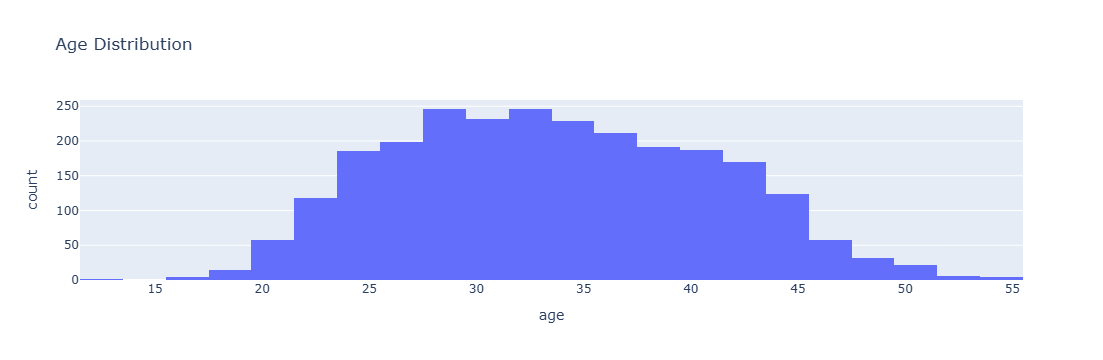

In [337]:
# Graph 1: Age Distribution
px.histogram(df_fin, x='age', nbins=40, title='Age Distribution').show()

In [338]:

# Step 2: Plot histogram
fig = px.histogram(df_fin, x='age', nbins=30, title='Cleaned Age Distribution (12–50)',
                   color_discrete_sequence=['royalblue'], opacity=0.8)
fig.update_layout(bargap=0.1)
fig.show()


## Crosstab showing Age groups and their preference methods.

In [339]:
pd.crosstab(df_fin['age'], df_fin['method_chosen_category'])

method_chosen_category,Hormonal - Injectable,Hormonal - Oral Pills,Hormonal - implant,Non-Hormonal or Hormonal - IUD,Others
age,,,,,
13.0,0,1,0,0,0
16.0,0,0,1,0,0
17.0,2,0,0,1,0
18.0,2,1,0,0,0
19.0,4,1,6,0,0
20.0,7,3,3,0,1
21.0,30,8,5,0,0
22.0,28,18,11,0,0
23.0,35,16,7,3,0


## looking at gender

In [340]:
df_fin['gender'].value_counts()

gender
Female    2534
Name: count, dtype: int64

##  Descriptive Statistics of Reproductive Health Variables

This cell summarizes the distribution of key reproductive health variables in the **filtered dataset** 

### Selected Variables:
- **gravidity**: Total number of pregnancies.
- **parity**: Number of live births.
- **children_in_life**: Number of living children.
- **desired_number_of_children**: Number of children the respondent ideally wants.
- **number_of_children_died**: Number of children the respondent has lost.
- **age**: Age of the respondent.
- **time_since_lmp**: Time (in days) since last menstrual period (LMP).
- **duration_of_utilization(in months)**
- **the_period_the_method_will_last**


In [341]:
df_fin[['gravidity','parity','children_in_life','desired_number_of_children','number_of_children_died', 'age',
            'time_since_lmp', 'duration_of_utilization', 'the_period_the_method_will_last']].describe()

,gravidity,parity,children_in_life,desired_number_of_children,number_of_children_died,age,time_since_lmp,duration_of_utilization,the_period_the_method_will_last
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.00000,2534.000000,2534.000000
mean,2.852013,2.679163,2.594712,3.338595,0.142857,33.591949,26.52131,43.204025,14.897356
std,1.557872,1.407240,1.358218,1.213083,0.608625,7.243279,263.88229,482.613786,28.859821
min,1.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.00000,0.000000,0.100000
25%,2.000000,2.000000,2.000000,3.000000,0.000000,28.000000,2.00000,6.000000,3.000000
50%,3.000000,2.000000,2.000000,3.000000,0.000000,33.000000,3.00000,24.000000,3.000000
75%,4.000000,3.000000,3.000000,4.000000,0.000000,39.000000,3.00000,48.000000,3.000000
max,13.000000,10.000000,8.000000,12.000000,12.000000,55.000000,9042.00000,24204.000000,240.000000


## Bar Plot: Total Counts of Key Reproductive Health Indicators

This visualization displays the **total sum** of selected reproductive health-related variables from the filtered dataset.

### Columns Visualized:
- **gravidity**: Total number of pregnancies
- **parity**: Total number of live births
- **children_in_life**: Total living children
- **desired_number_of_children**: Aggregate of the desired number of children
- **number_of_children_died**: Total number

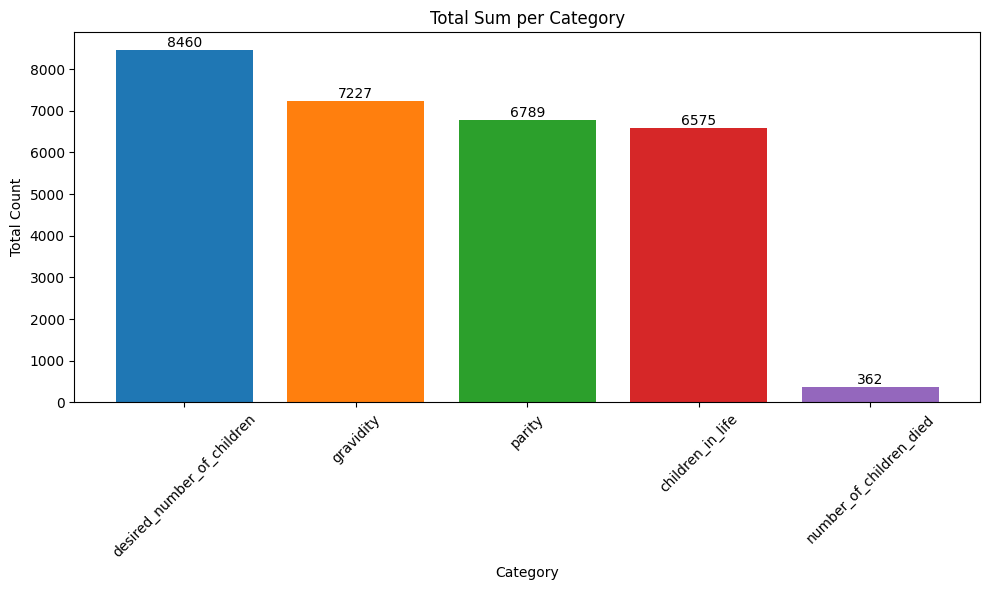

In [342]:
# Columns to visualize
columns = ['desired_number_of_children','gravidity', 'parity', 'children_in_life', 'number_of_children_died']

# Calculate totals
totals = df_fin[columns].sum()

# Plot
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.bar(columns, totals, color=colors)

# Add labels
plt.title("Total Sum per Category")
plt.ylabel("Total Count")
plt.xlabel("Category")
plt.xticks(rotation=45)

# Add values on top of bars
for i, total in enumerate(totals):
    plt.text(i, total + 1, str(int(total)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Box Plot: Reproductive and Child Health Variables

In [343]:

# Columns of interest
cols = [
    'gravidity',
    'parity',
    'children_in_life',
    'desired_number_of_children',
    'number_of_children_died'
]

# Melt the DataFrame to long format for Plotly
df_melted = df_fin[cols].melt(var_name='Variable', value_name='Value')

# Create the box plot with jittered points
fig = px.box(
    df_melted,
    x='Variable',
    y='Value',
    points='all',  # Show all points for better visualization
    color='Variable',
    title='Box Plot of Reproductive and Child Variables',
    height=600,
    width=1000
)

# Optional: Customize layout to avoid crowding
fig.update_layout(
    boxmode='group',
    showlegend=False,
    yaxis_title='Value',
    xaxis_title='Variable',
)

fig.show()


## Crosstab showing preference of choosen method and number of chidren

In [344]:
df_fin.loc[:, 'children_in_life'] = df_fin['children_in_life'].astype(int)

crosstab = pd.crosstab(df_fin['children_in_life'], df_fin['method_chosen_category'])
crosstab

method_chosen_category,Hormonal - Injectable,Hormonal - Oral Pills,Hormonal - implant,Non-Hormonal or Hormonal - IUD,Others
children_in_life,,,,,
0.0,17,8,4,0,1
1.0,334,130,52,12,3
2.0,434,243,96,21,10
3.0,274,201,78,25,10
4.0,154,115,48,13,5
5.0,75,57,25,9,3
6.0,25,18,8,2,5
7.0,5,6,2,0,0
8.0,1,2,2,0,1


In [345]:
df_fin.loc[:,'desired_number_of_children'] = df_fin['desired_number_of_children'].astype(int)
crosstab = pd.crosstab(df_fin['desired_number_of_children'], df_fin['method_chosen_category'],)
crosstab

method_chosen_category,Hormonal - Injectable,Hormonal - Oral Pills,Hormonal - implant,Non-Hormonal or Hormonal - IUD,Others
desired_number_of_children,,,,,
0.0,35,20,16,3,2
1.0,14,9,4,0,0
2.0,222,67,44,13,6
3.0,557,343,126,29,5
4.0,350,221,76,25,16
5.0,102,81,38,9,4
6.0,29,25,8,3,5
7.0,6,7,2,0,0
8.0,3,6,1,0,0


In [346]:
df_fin['desired_number_of_children'].value_counts()

desired_number_of_children
3.0     1060
4.0      688
2.0      352
5.0      234
0.0       76
6.0       70
1.0       27
7.0       15
8.0       10
10.0       1
12.0       1
Name: count, dtype: int64

In [347]:
df_fin['children_in_life'].value_counts()

children_in_life
2.0    804
3.0    588
1.0    531
4.0    335
5.0    169
6.0     58
0.0     30
7.0     13
8.0      6
Name: count, dtype: int64

##  Total Number of Children Died by District where E-health platform is being used

This analysis aggregates the total number of children who have died in each district.



In [348]:
df_fin.loc[:,'number_of_children_died']=df_fin['number_of_children_died'].astype(int)
df_fin.groupby('district')['number_of_children_died'].sum().sort_values(ascending=False)

district
Rulindo       199.0
Kicukiro       66.0
Gasabo         58.0
Nyarugenge     19.0
Bugesera       12.0
Nyagatare       6.0
Gicumbi         1.0
Ngoma           1.0
Burera          0.0
Gakenke         0.0
Kamonyi         0.0
Muhanga         0.0
Nyamasheke      0.0
Nyaruguru       0.0
Rubavu          0.0
Rusizi          0.0
Name: number_of_children_died, dtype: float64

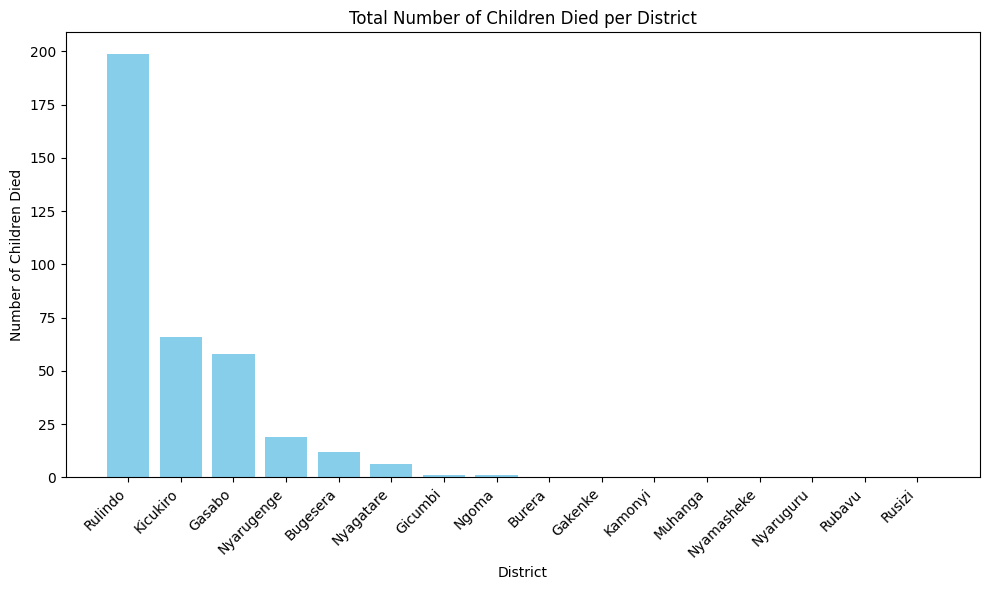

In [349]:

district_deaths = df_fin.groupby('district')['number_of_children_died'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(district_deaths.index, district_deaths.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Total Number of Children Died per District')
plt.xlabel('District')
plt.ylabel('Number of Children Died')
plt.tight_layout()
plt.show()


### Daily Client Attendance Analysis

This visualization shows the trend of client attendances over time. We group the data by the `consultation_date` field and count how many consultations occurred on each day.


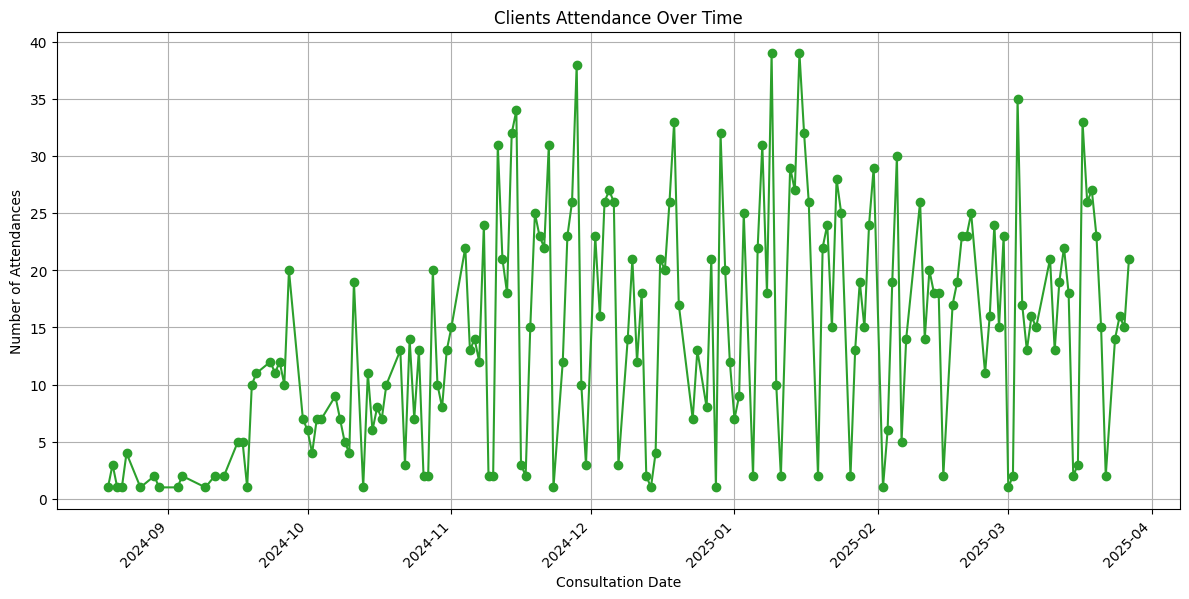

In [350]:
# Group by date and count attendances
daily_counts = df_fin['consultation_date'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', marker='o', color='#2ca02c')

# Formatting
plt.title('Clients Attendance Over Time')
plt.xlabel('Consultation Date')
plt.ylabel('Number of Attendances')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()


##  Family Planning Methods Data

This section of the analysis focuses on columns related to family planning methods, which are important for understanding the use and availability of family planning services.


In [351]:
df_fin[['desired_method','family_plan_method_used','method_offered','method_chosen_category']]

,desired_method,family_plan_method_used,method_offered,method_chosen_category
29,INJECTION,Combined Oral Pills (COCs),Sayana Press,Hormonal - Injectable
34,INJECTION,Injectable,Depo-Provera,Hormonal - Injectable
36,Implant/jadelle (MJ),Implant/Jadelle,Implant/Jadelle,Hormonal - implant
43,Implant/jadelle (MJ),Implant/Jadelle,Implant/Jadelle,Hormonal - implant
48,depo-provera,Depo-Provera,Depo-Provera,Hormonal - Injectable
...,...,...,...,...
15160,Pillule progestative (PP),Combined Oral Pills (COCs),Progestin-Only Pills (POPs),Hormonal - Oral Pills
15163,Injectables (Depo-Provera/Injectables (Depo-Pr...,Depo-Provera,Depo-Provera,Hormonal - Injectable
15164,Injectables_DMPA-SC/Injectables_DMPA SC,Sayana Press,Sayana Press,Hormonal - Injectable
15167,Implant/jadelle (MJ),Implant/Jadelle,Implant/Jadelle,Hormonal - implant


In [352]:
df_fin['desired_method'].value_counts()

desired_method
Injectables (Depo-Provera/Injectables (Depo-Provera))                   446
Injectables_DMPA-SC/Injectables_DMPA SC                                 430
Combined pills                                                          371
Implant/jadelle (MJ)                                                    307
INJECTION                                                               249
depo-provera                                                            191
Pillule ombinee (PC)                                                    182
Pillule progestative (PP)                                               100
IUD                                                                      77
Oral Contraceptives, progestative / Contraceptifs oraux, progestatif     62
Oral Contraceptives, combined /Contraceptifs oraux, combiné              56
Male Condoms                                                             24
⁠Implant/implanon                                                        

In [353]:
df_fin['method_offered'].value_counts()

method_offered
Depo-Provera                     683
Combined Oral Pills (COCs)       608
Sayana Press                     545
Implant/Jadelle                  315
Progestin-Only Pills (POPs)      162
Injectable                        97
Intrauterine Device (IUD)         83
Male Condoms                      25
Lactational Amenorrhea Method      9
Barrier Methods                    2
Noristerat                         2
Female Condom                      1
Cycle Beads                        1
Natural Family Planning (NFP)      1
Name: count, dtype: int64

## Distribution of Contraceptive Methods Offered

In [354]:
# Get value counts of 'method_offered'
method_counts = df_filtered['method_offered'].value_counts().reset_index()
method_counts.columns = ['Method Offered', 'Count']


fig = px.bar(method_counts,
             x='Method Offered',
             y='Count',
             title='Distribution of Contraceptive Methods Offered',
             labels={'Method Offered': 'Contraceptive Method', 'Count': 'Number of Patients'},
             color='Method Offered', 
             text='Count')


fig.update_layout(
    xaxis_tickangle=-45,   
    showlegend=False,      
    plot_bgcolor='white',
    font=dict(size=14)
)

# Display the plot
fig.show()


In [355]:
df_fin['method_chosen_category'].value_counts()

method_chosen_category
Hormonal - Injectable             1319
Hormonal - Oral Pills              780
Hormonal - implant                 315
Non-Hormonal or Hormonal - IUD      82
Others                              38
Name: count, dtype: int64

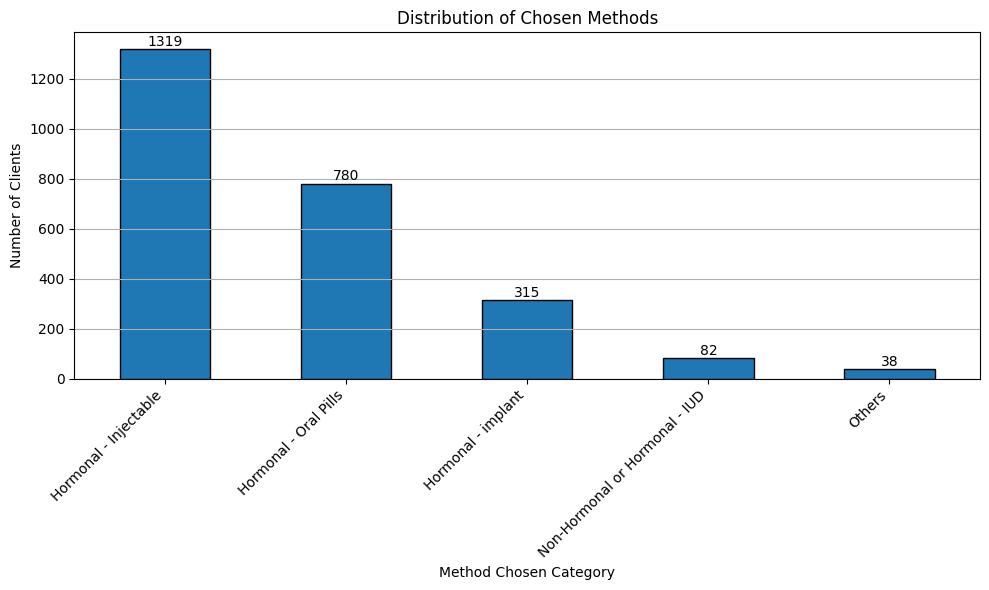

In [356]:
# Count the number of occurrences for each method
method_counts = df_fin['method_chosen_category'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = method_counts.plot(kind='bar', color='#1f77b4', edgecolor='black')

# Add counts on top of each bar
for idx, value in enumerate(method_counts):
    plt.text(idx, value + 1, str(value), ha='center', va='bottom', fontsize=10)

# Formatting
plt.title('Distribution of Chosen Methods')
plt.xlabel('Method Chosen Category')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [357]:
df_filtered['marital_status'].value_counts()

marital_status
Married          10219
Single            4600
Separated           79
Widow/Widower       36
Divorced            32
Name: count, dtype: int64

In [358]:
px.pie(df, names='marital_status', title='Marital Status Distribution').show()

## Crosstable showing marital status with method category chosen

In [359]:
pd.crosstab(df_fin['marital_status'], df_fin['method_chosen_category'])


method_chosen_category,Hormonal - Injectable,Hormonal - Oral Pills,Hormonal - implant,Non-Hormonal or Hormonal - IUD,Others
marital_status,,,,,
Divorced,4,1,1,0,0
Married,868,566,150,50,27
Separated,3,1,2,0,0
Single,439,212,161,30,10
Widow/Widower,5,0,1,2,1


## Family Planning Methods by Marital Status

This interactive grouped bar chart visualizes the distribution of family planning methods offered, segmented by clients' marital status. 


In [360]:

grouped_data = df_fin.groupby(['marital_status', 'method_offered'])['method_offered'].count().reset_index(name='count')

# Plot interactive grouped bar chart
fig = px.bar(grouped_data,
             x='marital_status',
             y='count',
             color='method_offered',
             barmode='group',
             title='Family Planning Methods Offered by Marital Status',
             labels={'count': 'Number of Clients', 'marital_status': 'Marital Status', 'method_offered': 'Method Offered'},
             hover_name='method_offered',
             text='count')

fig.update_layout(
    xaxis_tickangle=-45,
    legend_title='Method Offered',
    bargap=0.2,
    plot_bgcolor='white'
)

fig.update_traces(textposition='outside')

fig.show()


In [361]:
df_fin.loc[:,'education_level'] = df_fin['education_level'].str.replace('university', 'Unknown')


In [362]:
# Create a clean DataFrame for plotting
edu_counts = df_fin['education_level'].value_counts().reset_index()
edu_counts.columns = ['education_level', 'count']

# Plot with Plotly
px.bar(edu_counts,
       x='education_level', y='count',
       labels={'education_level': 'Education Level', 'count': 'Count'},
       title='Education Level Distribution').show()


## Table showing education level vs Method choosen category

In [363]:
pd.crosstab(df_fin['education_level'], df_fin['method_chosen_category'])


method_chosen_category,Hormonal - Injectable,Hormonal - Oral Pills,Hormonal - implant,Non-Hormonal or Hormonal - IUD,Others
education_level,,,,,
Secondary,378,218,71,18,8
Unknown,568,361,135,44,15
no education,17,4,5,1,0
primary,356,197,104,19,15


## Distribution of Catchment Areas

This count plot displays the number of records from each catchment area.

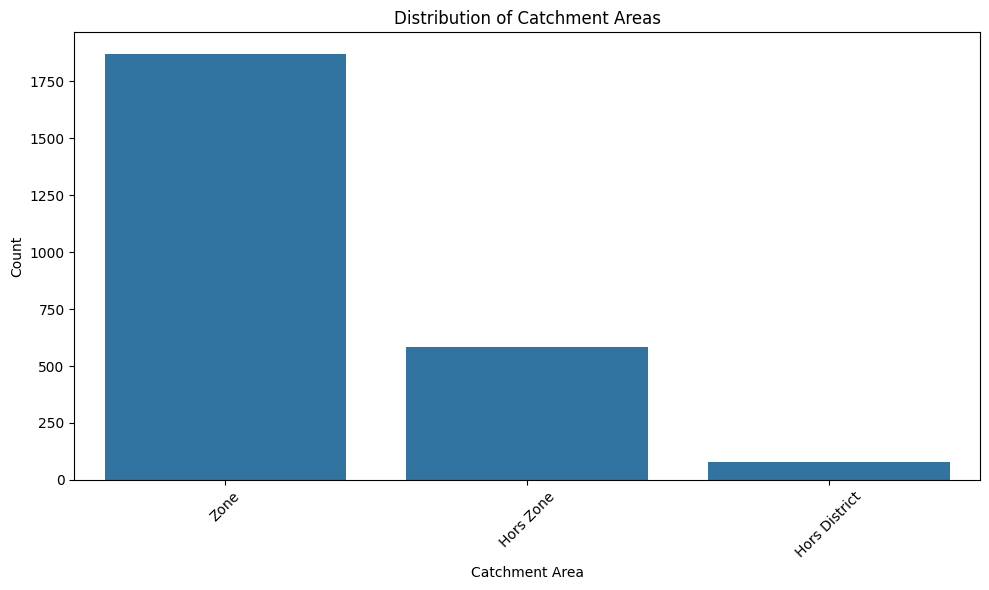

In [364]:
# Count plot for catchment_area
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fin, x='catchment_area', order=df_filtered['catchment_area'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Catchment Areas')
plt.xlabel('Catchment Area')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [365]:
#Partner Involvement by Marital Status
px.histogram(df_fin, x='marital_status', color='accompanied_by_partner',
             barmode='group', title='Partner Involvement by Marital Status').show()


## Correlation Heatmap of Numeric Variables

This heatmap visualizes the correlation between numeric variables in the dataset. The correlation values are represented by color intensity, where positive correlations are shown in warmer colors and negative correlations in cooler colors.

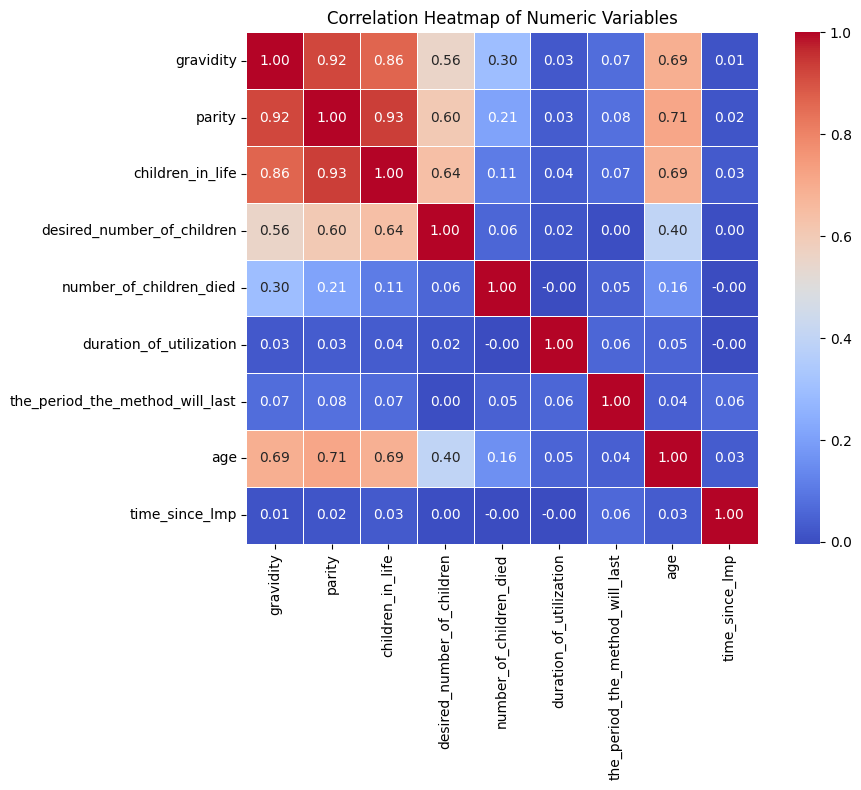

In [366]:
numeric_columns=(df_fin.select_dtypes(include='number')).columns

#Compute the correlation matrix
correlation_matrix = df_fin[numeric_columns].corr()

#Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()


In [367]:
df_fin['postpartum_family_planning'].value_counts()

postpartum_family_planning
No     2262
Yes     272
Name: count, dtype: int64

In [368]:
filtered_reasons = df_fin['reason_to_stop_category'].value_counts().drop('Ongoing')

# Display the filtered reasons
filtered_reasons


reason_to_stop_category
Voluntary                         305
Access/availability issues        207
Side Effects                      179
Pregnancy                         176
Wanted To Have Child              166
Wanted a more effective method    144
Inconvenient to use                52
Social                             49
Health concerns                    15
Name: count, dtype: int64

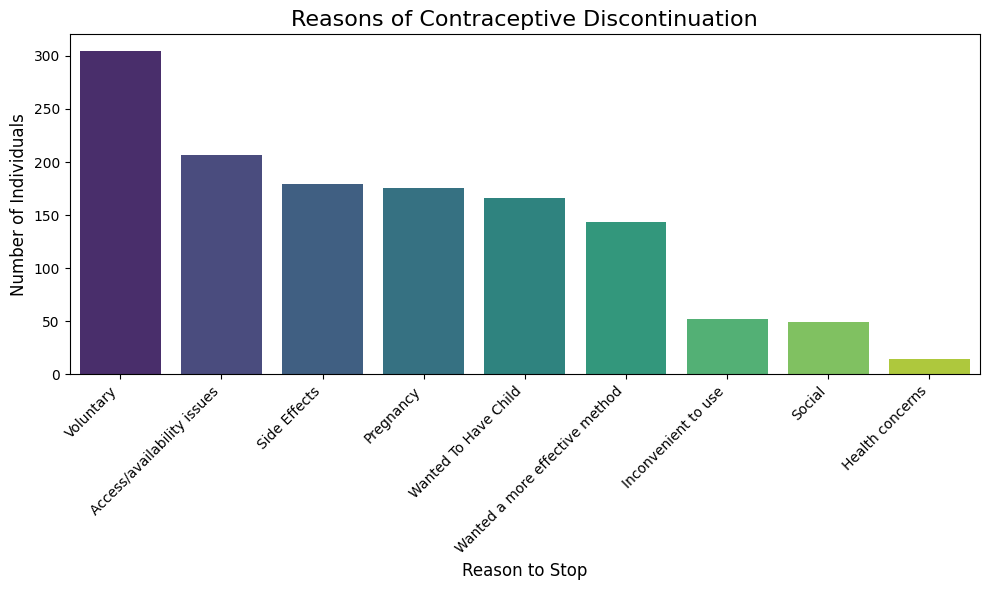

In [369]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_reasons.index, y=filtered_reasons.values, palette='viridis',hue=filtered_reasons.index)

# Formatting
plt.title('Reasons of Contraceptive Discontinuation', fontsize=16)
plt.xlabel('Reason to Stop', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

plt.show()

In [370]:
df_fin['profession_category'].value_counts()

profession_category
other            1546
agriculture       427
household         264
unemployed        142
services          133
education          18
public_sector       2
professional        2
Name: count, dtype: int64

## Chi-Squared Test for Feature Selection (Categorical Variables)

In this step, we perform a Chi-Squared test to identify which categorical features have a statistically significant association with the target variable, `method_chosen_category`. The process includes:

- Encoding all categorical features and the target using Label Encoding.
- Applying the Chi-Squared test to assess the dependence between each feature and the target.
- Displaying only those features with a p-value less than 0.05, indicating statistical significance.

This helps in selecting meaningful features for model training.


In [371]:
# Categorical Columns to Encode (One-Hot Encoding or Label Encoding)
categorical_columns = [
     
    'province', 
    'district', 
    'company', 
    'gender',
    'discharging',
    'education_level', 
    'catchment_area', 
    'marital_status', 
    'accompanied_by_partner', 
    'birth_spacing', 
    'birth_limitation', 
    'desired_method', 
    'previous_utilization_of_contraception', 
    'family_plan_method_used', 
    'profession_category', 
    
]

# Numeric Columns (Keep as-is)
numeric_columns = [
    'gravidity', 
    'parity', 
    'children_in_life', 
    'desired_number_of_children', 
    'number_of_children_died', 
    'duration_of_utilization', 
    'the_period_the_method_will_last', 
    'age',
    'time_since_lmp'
]


In [372]:

target_column = 'method_chosen_category'

# Drop rows with missing values
df_cleaned = df_fin.copy()

# Ensure target is 1D
if df_cleaned[target_column].ndim > 1:
    df_cleaned[target_column] = df_cleaned[target_column].values.argmax(axis=1)

# Encode target
le_target = LabelEncoder()
df_cleaned[target_column] = le_target.fit_transform(df_cleaned[target_column])

# Encode features
df_encoded = df_cleaned.copy()
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Run Chi-Squared test
X = df_encoded[categorical_columns]
y = df_encoded[target_column]

chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)

# Combine results
chi2_results = pd.DataFrame({
    'Feature': categorical_columns,
    'Chi2 Score': chi2_selector.scores_,
    'p-Value': chi2_selector.pvalues_
})
# print(chi2_results)
# Filter by p-value < 0.05
significant_features = chi2_results[chi2_results['p-Value'] < 0.05]\
    .sort_values(by='Chi2 Score', ascending=False)

print("Statistically significant features (p < 0.05):")
print(significant_features)


Statistically significant features (p < 0.05):
                    Feature  Chi2 Score       p-Value
13  family_plan_method_used  466.135114  1.410546e-99
11           desired_method  243.661480  1.509694e-51
2                   company  237.305872  3.528646e-50
1                  district  216.995681  8.306003e-46
8    accompanied_by_partner   40.851809  2.884573e-08
14      profession_category   35.529202  3.616356e-07
7            marital_status   33.081046  1.149700e-06
0                  province   18.478903  9.945667e-04
10         birth_limitation   14.078379  7.049057e-03
4               discharging   12.960975  1.146806e-02
5           education_level   11.508206  2.140881e-02


In [373]:
significant_categorical_features = [
    'family_plan_method_used',
    'desired_method',
    'company',
    'district',
    'accompanied_by_partner',
    'profession_category',
    'marital_status',
    'province',
    'birth_limitation',
    'discharging',
    'education_level'
]


## Correlation Heatmap of Numeric Features

- Shows relationships between numeric variables  
- Helps detect multicollinearity  
- Guides feature selection  
- High correlations may signal redundancy  


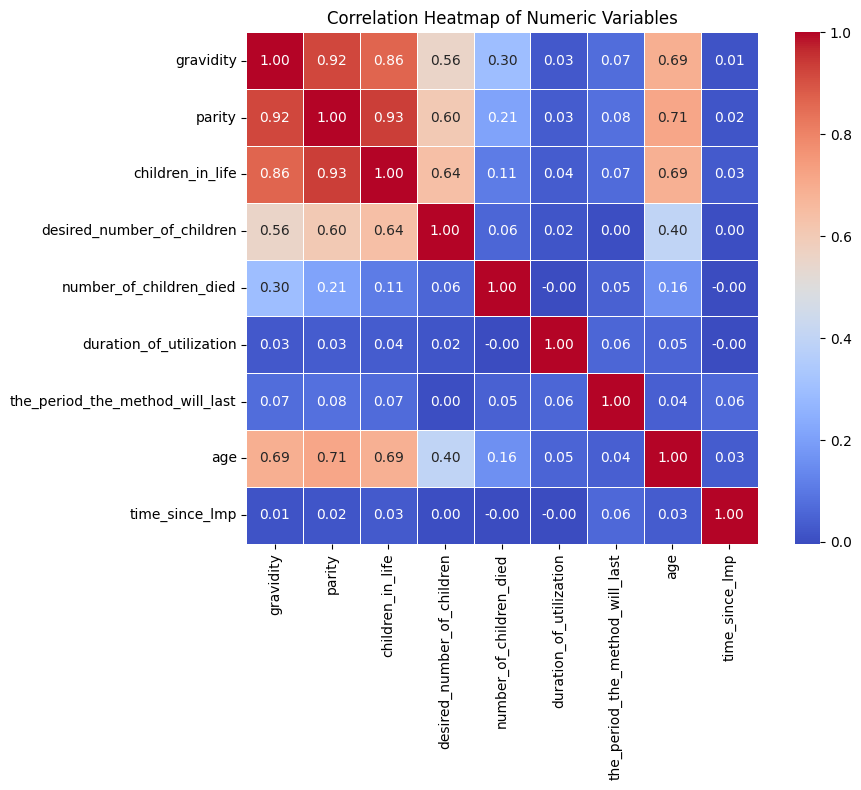

In [374]:
#Compute the correlation matrix
correlation_matrix = df_fin[numeric_columns].corr()

#Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()


In [375]:
significant_numerical_features=[
    'children_in_life',  # Representative of gravidity and parity
    'desired_number_of_children',
    'number_of_children_died',
    'duration_of_utilization',
    'the_period_the_method_will_last',
    'age',
    'time_since_lmp'
]


In [376]:
df_ready_for_model_training = df_fin[significant_numerical_features + significant_categorical_features + [target_column]]


In [377]:
df_ready_for_model_training.to_csv('final_family_planning_data.csv')